# Médiathèque José Cabanis

   Les amoureux du cinéma déplorent la disparition de bons nombre de vidéos store au fil des années.La Vod, le streaming ont eut raison des soirées films en familles avec un dvd emprunté chaque semaines. Les mediathèques apparaissent alors comme de bonnes alternatives, l'emprunt de films y rencontre un grand succès. 
Nous nous intérésserons ici a la médiathèque José Cabanis situé a Toulouse.
   
   Les données fournies sont elles toutes cohérentes?
   Quelles années ont enregistrés le plus d'emprunts?
   Quelles sont les villes des sociétés de production qui rencontrent le plus de succès?
   Quels films peuvent être qualifié de best seller?
    
    


![](media.jpg)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np
import os

In [2]:
movies= pd.read_csv("toulouse_data.csv",sep=";")

# Description du Data Frame

In [3]:
movies.head()

,Annee,nbre_de_prets,titre,auteur,editeur,indice,bib,cote,cat_1,cat_2
0,2017,333,La belle au bois dormant,"Geronimi, Clyde",Marne-la-Vallée : Buena Vista Home Entertainme...,A BELL,CABANIS,Anim BELL,E,DVDFIC
1,2017,335,La belle et le clochard,"Luske, Hamilton","[S.l] : Buena Vista Home Intertainment, 2006",A BELL,CABANIS,A BELL,E,DVDFIC
2,2017,239,Miss Peregrine et les enfants particuliers,"Burton, Tim","Paris : 20th Century Fox, 2017",MISS,CABANIS,MISS,A,DVDFIC
3,2017,217,Porco Rosso,"Miyazaki, Hayao","[S.l] : Buena Vista Home Intertainment, 2006",A PORC,CABANIS,A PORC,E,DVDFIC
4,2017,195,Iron Man 3,"Black, Shane","Marne-la-Vallée : The Walt Disney Company, 2013",BDT C IRON,CABANIS,SF IRON,A,DVDFIC


In [4]:
movies.shape

(5014, 10)

In [5]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5014 entries, 0 to 5013
Data columns (total 10 columns):
Annee            5014 non-null int64
nbre_de_prets    5014 non-null int64
titre            5014 non-null object
auteur           5014 non-null object
editeur          5014 non-null object
indice           5009 non-null object
bib              5014 non-null object
cote             5014 non-null object
cat_1            5014 non-null object
cat_2            5014 non-null object
dtypes: int64(2), object(8)
memory usage: 391.8+ KB


In [6]:
movies.describe()

,Annee,nbre_de_prets
count,5014.000000,5014.000000
mean,2015.512565,182.577782
std,2.878368,59.651306
min,2011.000000,66.000000
25%,2013.000000,148.000000
50%,2016.000000,175.000000
75%,2018.000000,212.000000
max,2020.000000,522.000000


# Nettoyage Des données

Affichons un df avec toutes les lignes qui ont au moins une valeur manquante

In [7]:
val_manquantes = movies[movies.isnull().any(axis=1)]
val_manquantes

,Annee,nbre_de_prets,titre,auteur,editeur,indice,bib,cote,cat_1,cat_2
211,2015,167,Minuscule : la vie privée des insectes. Saison...,"Szabo, Thomas","[s.l.] : Editions Montparnasse, 2007",NaN,CABANIS,Anim MINU,E,DVDFIC
526,2012,253,Minuscule : la vie privée des insectes. Saison...,"Szabo, Thomas","[s.l.] : Editions Montparnasse, 2007",NaN,CABANIS,A MINU,E,DVDFIC
749,2011,132,Minuscule : la vie privée des insectes. Saison...,"Szabo, Thomas","[s.l.] : Editions Montparnasse, 2007",NaN,CABANIS,A MINU,E,DVDFIC
765,2013,210,Minuscule : la vie privée des insectes. Saison...,"Szabo, Thomas","[s.l.] : Editions Montparnasse, 2007",NaN,CABANIS,A MINU,E,DVDFIC
1351,2014,197,Minuscule : la vie privée des insectes. Saison...,"Szabo, Thomas","[s.l.] : Editions Montparnasse, 2007",NaN,CABANIS,Anim MINU,E,DVDFIC


Faisons disparaitre ces valeurs manquantes

In [8]:
movies.dropna(inplace=True)

In [9]:
movies.isnull().any()



Annee            False
nbre_de_prets    False
titre            False
auteur           False
editeur          False
indice           False
bib              False
cote             False
cat_1            False
cat_2            False
dtype: bool

Renommons les colonnes pour plus de clarté

In [10]:
mov=movies.rename(columns = {'Annee': 'Année', 'nbre_de_prets': 'Qtité de pret','titre':'Titre','editeur':'Editeur','indice':'Indice','bib':'Bibliothèque','cote':'Genre'})
mov

,Année,Qtité de pret,Titre,auteur,Editeur,Indice,Bibliothèque,Genre,cat_1,cat_2
0,2017,333,La belle au bois dormant,"Geronimi, Clyde",Marne-la-Vallée : Buena Vista Home Entertainme...,A BELL,CABANIS,Anim BELL,E,DVDFIC
1,2017,335,La belle et le clochard,"Luske, Hamilton","[S.l] : Buena Vista Home Intertainment, 2006",A BELL,CABANIS,A BELL,E,DVDFIC
2,2017,239,Miss Peregrine et les enfants particuliers,"Burton, Tim","Paris : 20th Century Fox, 2017",MISS,CABANIS,MISS,A,DVDFIC
3,2017,217,Porco Rosso,"Miyazaki, Hayao","[S.l] : Buena Vista Home Intertainment, 2006",A PORC,CABANIS,A PORC,E,DVDFIC
4,2017,195,Iron Man 3,"Black, Shane","Marne-la-Vallée : The Walt Disney Company, 2013",BDT C IRON,CABANIS,SF IRON,A,DVDFIC
...,...,...,...,...,...,...,...,...,...,...
5009,2020,68,Comme un avion,"Podalydes, Bruno",-,"Neuilly-sur-Seine : UGC Vidâeo, 2015",C COMM,CABANIS,C COMM,A
5010,2020,67,Sibel,"Giovanetti, Guillaume",-,"Paris : Pyramide Vidâeo, 2019",SIBE,CABANIS,SIBE,A
5011,2020,67,"L'amie prodigieuse. Saison 2 : le nouveau nom,...","Ferrante, Elena",-,"Issy-les-Moulineaux : Studio Canal vidâeo, 2020",TV AMIE,CABANIS,TV AMIE,A
5012,2020,66,Quai d'Orsay,"Tavernier, Bertrand",-,"Paris : Pathâe, 2014",C QUAI,CABANIS,C QUAI,A


Supprimons les colonnes peu intéressantes.



In [11]:
mm= mov.drop(columns=["cat_1","cat_2"])

Classons le tableau par année de 2011 à 2020

In [12]:
movies_clean  = mm.set_index('Année')

In [13]:
movies_clean.sort_index(inplace=True) 

In [14]:
movies_clean

,Qtité de pret,Titre,auteur,Editeur,Indice,Bibliothèque,Genre
Année,,,,,,,
2011,256,Princes et princesses : six contes enchanteurs,"Ocelot, Michel","Paris : France Télévision Distribution [éd.], ...",Anim PRIN,CABANIS,Anim PRIN
2011,145,A l'origine,"Giannoli, Xavier","Paris : Europa Corp, 2009",ALOR,CABANIS,ALOR
2011,153,Le renard et l'enfant,"Jacquet, Luc",Marne-la-Vallée : Buena Vista Home Entertainme...,AV RENA,CABANIS,RENA
2011,158,"7h58, ce samedi-là","Lumet, Sidney","Neuilly-sur-Seine : Warner Home Vidéo, 2008",P 7H58,CABANIS,P 7H58
2011,159,L'ivresse du pouvoir,"Chabrol, Claude","Issy Les Moulineaux: TF1 Vidéo, 2007",IVRE,CABANIS,IVRE
...,...,...,...,...,...,...,...
2020,131,"Star Wars. Episode VII, le râeveil de la force","Abrams, Jeffrey Jacob",-,"[S.l.] : Lucasfilm, 2016",STAR,CABANIS
2020,131,Green book : sur les routes du Sud,"Farrelly, Peter",-,"Paris : Metropolitan filmexport, 2019",GREE,CABANIS
2020,127,Avengers : Endgame,"Russo, Joe",-,"Burbank CA, tats-Unis : Marvel, 2019",SF AVEN,CABANIS


Combien de livres empruntés par années?

In [15]:
movies_clean.groupby('Année')['Qtité de pret'].sum().sort_values(ascending=False)


Année
2016    109469
2012    108219
2013    106995
2015    103886
2014    102462
2017     91387
2018     87868
2011     80250
2019     79686
2020     44264
Name: Qtité de pret, dtype: int64

Illustration avec un diagramme en barre

Text(0.5, 1.0, 'Quantité de livres empruntés')

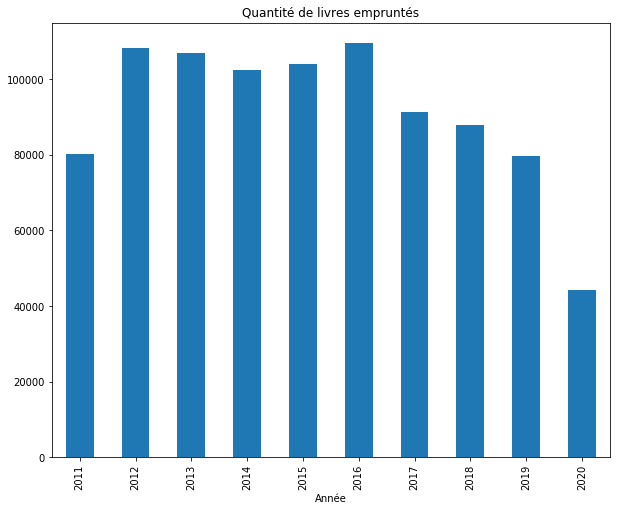

In [16]:
movies_clean.groupby('Année')["Qtité de pret"].sum().plot.bar(figsize=(10,8))
plt.title("Quantité de livres empruntés")

De quelle villes viennent les société de productions de ces films.

In [17]:
movies_clean['Editeur'].unique()

array(['Paris : France Télévision Distribution [éd.], 2001.',
       'Paris : Europa Corp, 2009',
       'Marne-la-Vallée : Buena Vista Home Entertainment, 2008',
       'Neuilly-sur-Seine : Warner Home Vidéo, 2008',
       'Issy Les Moulineaux: TF1 Vidéo, 2007', 'Paris : Arte Vidéo, 2005',
       'Suresnes : GCT, 2007', 'Paris : Wild side video, 2010',
       'Bussy Saint-Georges : Paramount Vidéo, 2010',
       '[S.l.] : DreamWorks France, 2009',
       'Paris : 20th Century Fox, 2010',
       'Boulogne-Billancourt  : TF1 Vidéo ; 2009',
       'Paris : MK2 éditions, 2010', 'Paris : Fox video, 2001',
       'Paris : Diaphana Films, 2010', 'Paris : Pathé Vidéo, 2002',
       'Paris : FPE, 2010',
       'Boulogne Billancourt : Studio Canal Vidéo, 2005', '-',
       'Paris : Pathé Vidéo, 2008',
       'Neuilly-sur-Seine : Warner Home Vidéo, 2009',
       'Neuilly-sur-Seine : M6 SND, 2009',
       'Boulogne-Billancourt : TF1 vidéo, 2001',
       'Paris : Naïve Vision, 2009',
       'Sures

In [18]:
ville_production = movies_clean['Editeur']

In [19]:
'Paris : France Télévision Distribution [éd.], 2001.'.split(':')[0].strip()

'Paris'

Créons une boucle afin de n'afficher que le nom des villes dans un nouvelle colonne nommé ville_prod

In [20]:
def get_ville(ville_production):
  return ville_production.split(':')[0].strip()

In [21]:
movies_clean['ville_prod']=movies_clean['Editeur'].apply(get_ville)

In [22]:
movies_clean

,Qtité de pret,Titre,auteur,Editeur,Indice,Bibliothèque,Genre,ville_prod
Année,,,,,,,,
2011,256,Princes et princesses : six contes enchanteurs,"Ocelot, Michel","Paris : France Télévision Distribution [éd.], ...",Anim PRIN,CABANIS,Anim PRIN,Paris
2011,145,A l'origine,"Giannoli, Xavier","Paris : Europa Corp, 2009",ALOR,CABANIS,ALOR,Paris
2011,153,Le renard et l'enfant,"Jacquet, Luc",Marne-la-Vallée : Buena Vista Home Entertainme...,AV RENA,CABANIS,RENA,Marne-la-Vallée
2011,158,"7h58, ce samedi-là","Lumet, Sidney","Neuilly-sur-Seine : Warner Home Vidéo, 2008",P 7H58,CABANIS,P 7H58,Neuilly-sur-Seine
2011,159,L'ivresse du pouvoir,"Chabrol, Claude","Issy Les Moulineaux: TF1 Vidéo, 2007",IVRE,CABANIS,IVRE,Issy Les Moulineaux
...,...,...,...,...,...,...,...,...
2020,131,"Star Wars. Episode VII, le râeveil de la force","Abrams, Jeffrey Jacob",-,"[S.l.] : Lucasfilm, 2016",STAR,CABANIS,-
2020,131,Green book : sur les routes du Sud,"Farrelly, Peter",-,"Paris : Metropolitan filmexport, 2019",GREE,CABANIS,-
2020,127,Avengers : Endgame,"Russo, Joe",-,"Burbank CA, tats-Unis : Marvel, 2019",SF AVEN,CABANIS,-


In [23]:
movies_clean.groupby('ville_prod').sum()["Qtité de pret"].sort_values(ascending=False)

ville_prod
Paris                          280411
-                              126378
Neuilly-sur-Seine              116137
Boulogne-Billancourt            78149
Marne-la-Vallée                 64579
Issy-les-Moulineaux             60897
[S.l.]                          39329
Suresnes                        26445
[S.l]                           19187
Boulogne Billancourt            15049
[s.l.]                          14951
U.S.A.                          12774
Paris cedex 14                   9451
Antony                           9056
Bussy Saint-Georges              6020
Vélizy                           3979
Paris Cedex 14                   3539
s.l.                             3442
Vélisy                           3319
Issy-Les-Moulineaux              2706
[S.l.] Etats-Unis                2310
Burbank, Calif.                  1905
Walt Disney France 2005          1815
Les Pavillons-sous-Bois          1463
Neuilly-Sur-Seine                1094
Nogent-sur-Marne                 1043
F

Les sociétés sont très majoritairement parisienne, en témoigne le diagramme ci dessous.

Text(0.5, 1.0, "Ville d'edition des films empruntés")

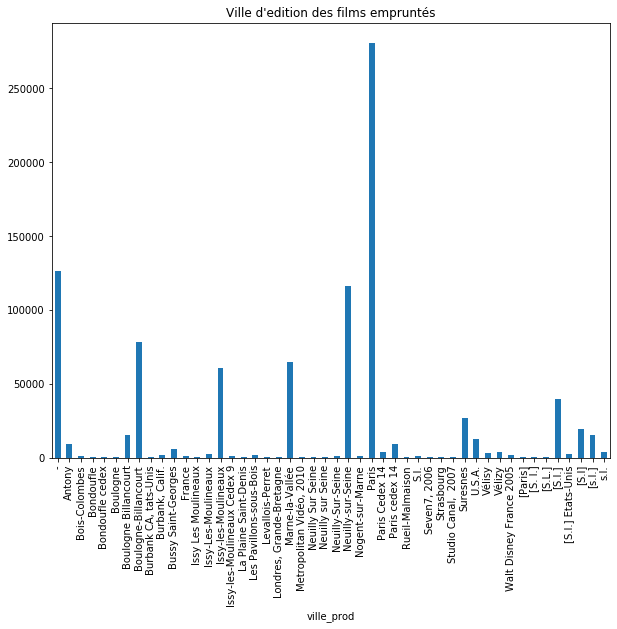

In [24]:
movies_clean.groupby('ville_prod')["Qtité de pret"].sum().plot.bar(figsize=(10,8))
plt.title("Ville d'edition des films empruntés")

# Le plus interéssant désormais! Quel film a été le plus emprunté en presque 10 ans ?

In [25]:
best_seller= movies_clean.groupby('Titre')["Qtité de pret"].sum().sort_values(ascending=False)

In [26]:
best_seller


Titre
Alice au pays des merveilles              3690
Peter Pan                                 3332
La belle et le clochard                   3043
Harry Potter et la chambre des secrets    2959
Ponyo sur la falaise                      2908
                                          ... 
Le traãitre                                 67
Engrenages. Saison 6, intâegrale            67
Les hirondelles de Kaboul                   67
La vie d'Adáele : chapitres 1 & 2           66
Photo de famille                            66
Name: Qtité de pret, Length: 1855, dtype: int64

![](burton.jpg)

Alice au pays des merveilles est devant. Le film est sortit en 2010 cela fait donc 10 ans qu'il est disponible, il a donc une grande longévité.Peter Pan et la Belle et le Clochard complète le podium. On remarque tout de meme que les films familiaux ne laissent pas beaucoup de place en tete du classement!